<a href="https://colab.research.google.com/github/AxelPolick/G6_TF_SistemasInteligentes/blob/main/SI_ImplementacionTF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Conectar google colab a Drive
from google.colab import drive
drive.mount('/MyDrive/')

Mounted at /MyDrive/


In [3]:
# Carga de datos
import csv
import pandas as pd
import numpy as np
import io
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
from sklearn.base import TransformerMixin
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [4]:
# Cargar datos de Hospitalizados
df_SEG_COV_pred = pd.read_csv('/MyDrive/MyDrive/TB_SEGUIM_COVID19_preprocesado.csv', encoding = 'utf8', delimiter = ',')

In [24]:
df_SEG_COV_pred.head(100)

# Rellenar datos faltantes con 0
df_SEG_COV_pred.fillna(0, inplace=True)

# Estandarización de los datos
scaler = preprocessing.StandardScaler()
scaled_features = scaler.fit_transform(features)

In [20]:
for col in df_SEG_COV_pred.columns:
  print(col)

evolucion_alta_1
evolucion_defuncion_1
evolucion_desfavorable_1
evolucion_estacionario_1
evolucion_favorable_1
evolucion_referido_1
con_oxigeno_1
con_ventilacion_1
esta_uci_1
esta_ucin_1
evolucion_alta_2
evolucion_defuncion_2
evolucion_desfavorable_2
evolucion_estacionario_2
evolucion_favorable_2
evolucion_referido_2
con_oxigeno_2
con_ventilacion_2
esta_uci_2
esta_ucin_2
evolucion_alta_3
evolucion_defuncion_3
evolucion_desfavorable_3
evolucion_estacionario_3
evolucion_favorable_3
evolucion_referido_3
con_oxigeno_3
con_ventilacion_3
esta_uci_3
esta_ucin_3
evolucion_alta_4
evolucion_defuncion_4
evolucion_desfavorable_4
evolucion_estacionario_4
evolucion_favorable_4
evolucion_referido_4
con_oxigeno_4
con_ventilacion_4
esta_uci_4
esta_ucin_4
Cluster


In [21]:
from sklearn.cluster import KMeans

features = df_SEG_COV_pred[[
    'evolucion_alta_1', 'evolucion_defuncion_1', 'evolucion_desfavorable_1', 'evolucion_estacionario_1', 'evolucion_favorable_1', 'evolucion_referido_1',
    'con_oxigeno_1', 'con_ventilacion_1', 'esta_uci_1', 'esta_ucin_1',
    'evolucion_alta_2', 'evolucion_defuncion_2', 'evolucion_desfavorable_2', 'evolucion_estacionario_2', 'evolucion_favorable_2', 'evolucion_referido_2',
    'con_oxigeno_2', 'con_ventilacion_2', 'esta_uci_2', 'esta_ucin_2',
    'evolucion_alta_3', 'evolucion_defuncion_3', 'evolucion_desfavorable_3', 'evolucion_estacionario_3', 'evolucion_favorable_3', 'evolucion_referido_3',
    'con_oxigeno_3', 'con_ventilacion_3', 'esta_uci_3', 'esta_ucin_3',
    'evolucion_alta_4', 'evolucion_defuncion_4', 'evolucion_desfavorable_4', 'evolucion_estacionario_4', 'evolucion_favorable_4', 'evolucion_referido_4',
    'con_oxigeno_4', 'con_ventilacion_4', 'esta_uci_4', 'esta_ucin_4'
]]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Número de clusters: 1, SSE: 45997.042694867385
Número de clusters: 2, SSE: 31027.510377679784
Número de clusters: 3, SSE: 22202.901743979703
Número de clusters: 4, SSE: 17884.237519137285
Número de clusters: 5, SSE: 16495.76068700442
Número de clusters: 6, SSE: 14972.932152520982
Número de clusters: 7, SSE: 13693.945591428563
Número de clusters: 8, SSE: 12898.31686980135
Número de clusters: 9, SSE: 12113.58396286265
Número de clusters: 10, SSE: 11510.148198689958


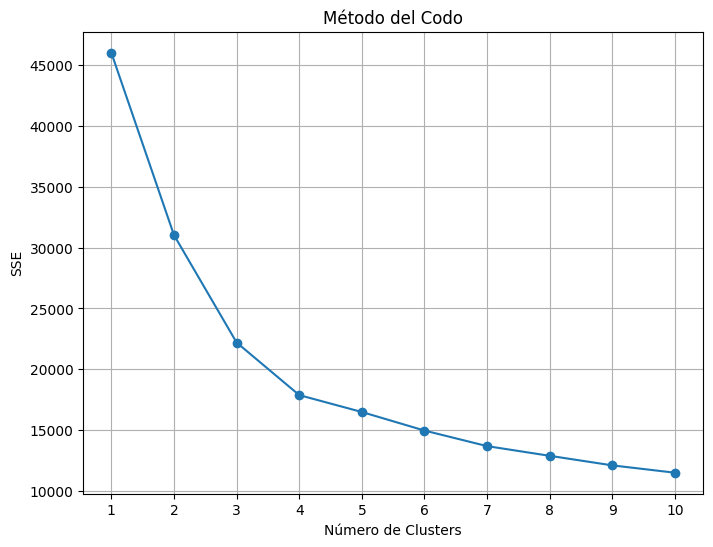

In [22]:
import matplotlib.pyplot as plt

# Método del codo para encontrar el número de clusters
sse = []
K = range(1, 11)
for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km = km.fit(features)
    sse.append(km.inertia_)

# Graficar el método del codo
plt.figure(figsize=(8, 6))
plt.plot(K, sse, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('SSE')
plt.title('Método del Codo')
plt.grid(True)
plt.xticks(K)
plt.show

# Imprimir valores
for k, score in zip(K, sse):
    print(f'Número de clusters: {k}, SSE: {score}')

In [27]:
!git config --global user.name "Harley7Damian"
!git config --global user.email "mayerly.damian@usil.pe"

In [29]:
# Aplicando KMeans con el número óptimo de clusters
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Añadir los clusters al dataframe original
df_SEG_COV_pred['Cluster'] = clusters

# Descripción de los clusters
for cluster in range(optimal_clusters):
    print(f'Cluster {cluster}')
    print(df_SEG_COV_pred[df_SEG_COV_pred['Cluster'] == cluster].describe())

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 0
       con_oxigeno_1  con_ventilacion_1   esta_uci_1  esta_ucin_1  \
count    3054.000000        3054.000000  3054.000000  3054.000000   
mean        0.893910           0.000982     0.011133     0.033071   
std         0.308004           0.031332     0.104941     0.178852   
min         0.000000           0.000000     0.000000     0.000000   
25%         1.000000           0.000000     0.000000     0.000000   
50%         1.000000           0.000000     0.000000     0.000000   
75%         1.000000           0.000000     0.000000     0.000000   
max         1.000000           1.000000     1.000000     1.000000   

       con_oxigeno_2  con_ventilacion_2   esta_uci_2  esta_ucin_2  \
count    3054.000000             3054.0  3054.000000  3054.000000   
mean        0.927636                0.0     0.013098     0.037983   
std         0.259132                0.0     0.113711     0.191186   
min         0.000000                0.0     0.000000     0.000000   
25%         1.000000   

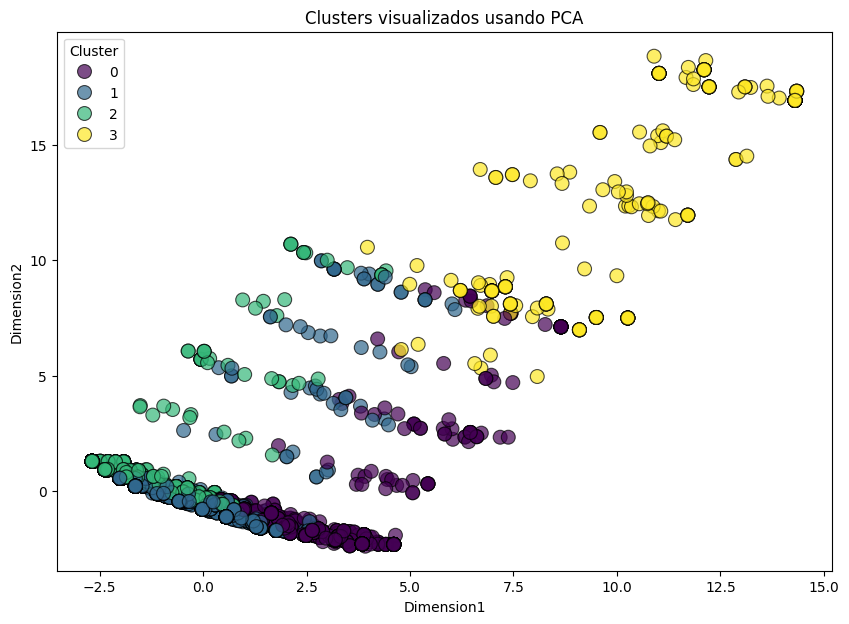

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Reducimps la dimensionalidad para visualización usando PCA
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

# Creando un DataFrame para los componentes principales
df_pca = pd.DataFrame(pca_features, columns=['Dimension1', 'Dimension2'])
df_pca['Cluster'] = clusters

# Graficar los clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(x='Dimension1', y='Dimension2', hue='Cluster', palette='viridis', data=df_pca, s=100, alpha=0.7, edgecolor='k')
plt.title('Clusters visualizados usando PCA')
plt.xlabel('Dimension1')
plt.ylabel('Dimension2')
plt.legend(title='Cluster')
plt.show()